### Created by Tanuj Bordikar

## TSF - GRIP

### Task 6 : Prediction using Decision Tree Algorithm

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

In [20]:
data = pd.read_csv("files/Iris.csv")
data.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
133,134,6.3,2.8,5.1,1.5,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica
71,72,6.1,2.8,4.0,1.3,Iris-versicolor
135,136,7.7,3.0,6.1,2.3,Iris-virginica
20,21,5.4,3.4,1.7,0.2,Iris-setosa


In [21]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [23]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [24]:
# label encoding 

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
data["spc_code"] = lb_make.fit_transform(data.Species)

In [25]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,spc_code
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


### Data Visualization

Text(0.5, 1.0, 'scatter')

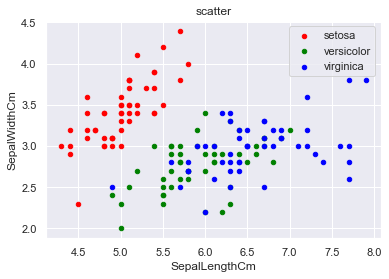

In [44]:
ax = data[data.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                    color='red', label='setosa')
data[data.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='green', label='versicolor', ax=ax)
data[data.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='blue', label='virginica', ax=ax)
ax.set_title("scatter")

Text(0.5, 1.0, 'scatter')

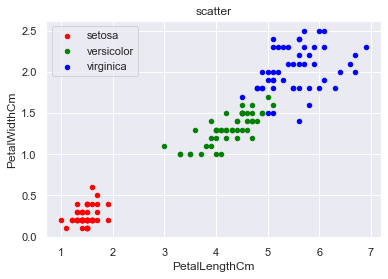

In [45]:
ax = data[data.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                    color='red', label='setosa')
data[data.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                color='green', label='versicolor', ax=ax)
data[data.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                color='blue', label='virginica', ax=ax)
ax.set_title("scatter")

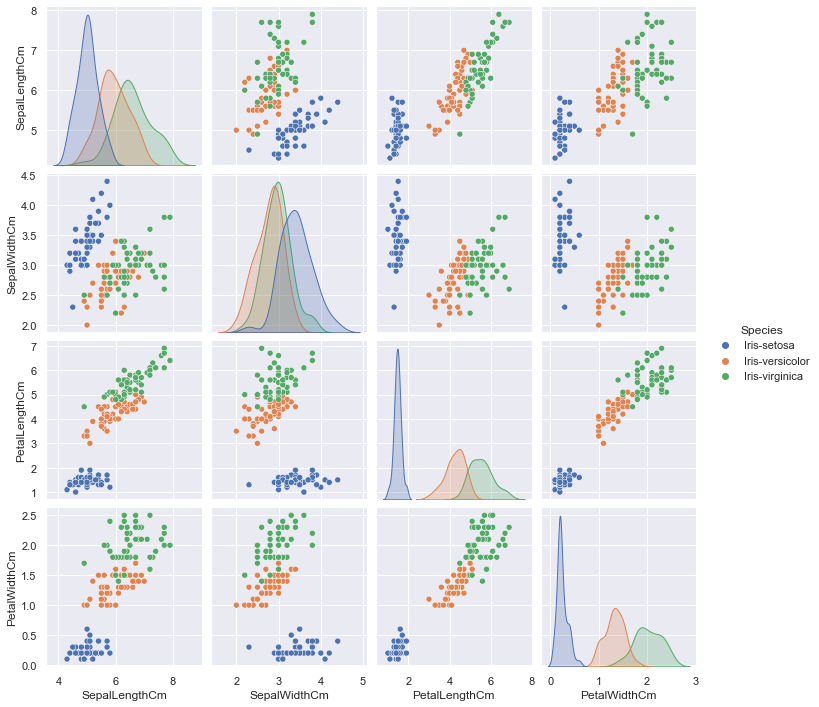

In [46]:
sns.set()
sns.pairplot(data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']],hue="Species", diag_kind="kde")

### Training and Testing of Data

In [47]:
X = data.iloc[:,1:5].values
y = data['spc_code'].values

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((135, 4), (15, 4), (135,), (15,))

In [49]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [50]:
pred = clf.predict(X_test)
df = pd.DataFrame({"Orignal":y_test,'Predicted':pred})

In [51]:
df

,Orignal,Predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,1,1
8,1,1
9,1,1


We got an accuracy score of : 100.0 %

 CONFUSION MATRIX :


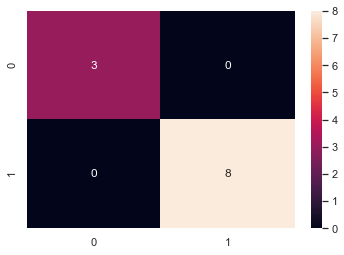

In [52]:
acc = accuracy_score(y_test, pred)
con_mat = confusion_matrix(y_test, pred, [0, 1])
print('We got an accuracy score of : {} %'.format(acc*100))
sns.heatmap(con_mat,annot=True)
print('\n CONFUSION MATRIX :')
plt.show()

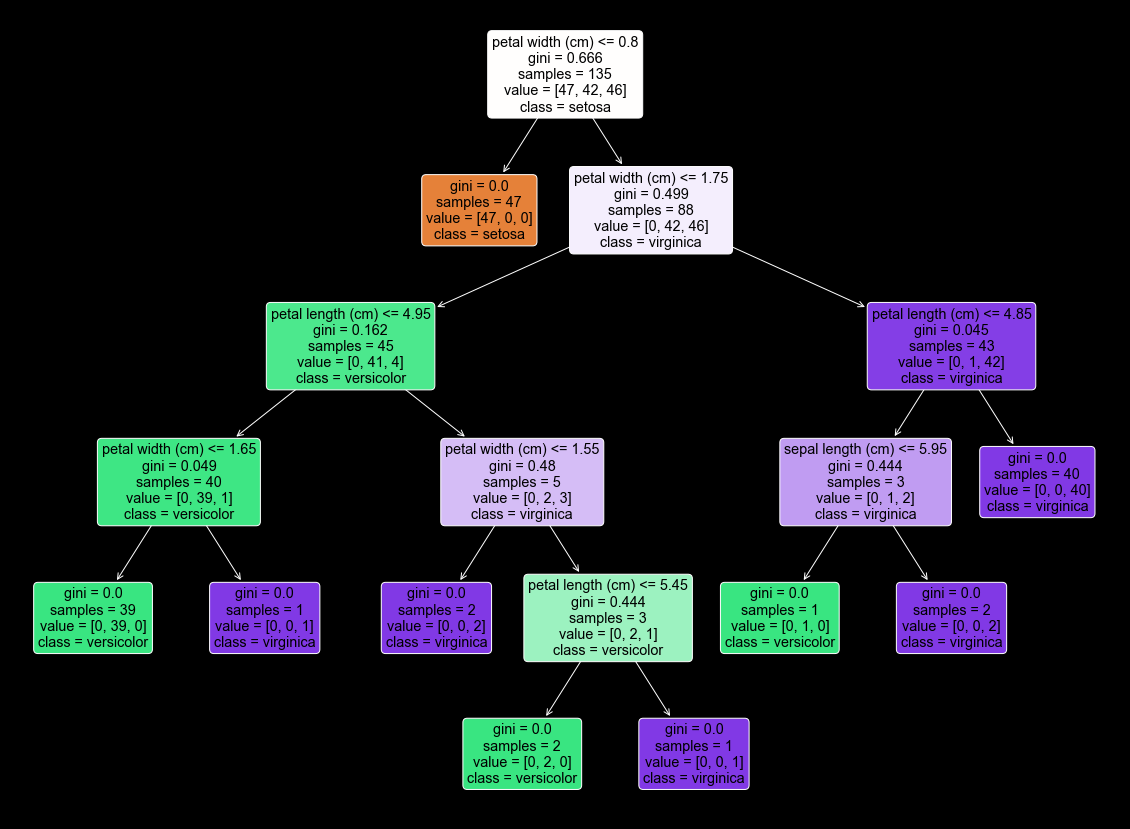

In [54]:
fig = plt.figure(figsize=(20,15))
plt.style.use('dark_background')
matplotlib.rcParams['text.color'] = 'black'
_ = tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names,rounded=True, filled=True)

### Thank you!